In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from mpl_toolkits import mplot3d

# Chapter 1 Molecular Mechanics and Potentials

## Lennard-Jones Potential

The Lennard Jones potential is used to describe the interation between uncharged, not chemically bonded atoms. We have an attractive term given by the London-Formula

\begin{equation*}
V = - \frac{C}{r^6}
\end{equation*}

and a repulsive term given by a equation of the form

\begin{equation*}
V = \frac{C_n}{r^n}
\end{equation*}

The typicall **Lennard-Jones-(12,6)-Potential** has the following form

\begin{equation*}
V(r) = 4 \epsilon \left( \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right)
\end{equation*}

where $\epsilon$ is the depth of the potential well and $\sigma$ is the distance at which the potential is zero.


In [2]:
# Define the Lennard-Jones 12-6 potential function
def lennard_jones_potential(r, epsilon, sigma):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

def lennard_jones_attractive(r,epsilon,sigma):
    return -4 *epsilon * (sigma/r)**6

def lennard_jones_repsulsive(r,epsilon,sigma):
    return 4 * epsilon * (sigma/r)**12


def plot_lj_potential(epsilon=1.0, sigma=1.0):
    r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
    V = lennard_jones_potential(r, epsilon, sigma)

    # Add attractive and repulsive components
    V_attractive = lennard_jones_attractive(r, epsilon, sigma)

    V_repulsive = lennard_jones_repsulsive(r, epsilon, sigma)

    
    plt.figure(figsize=(8, 6))
    plt.plot(r, V, label=f'ε={epsilon}, σ={sigma}')
    plt.plot(r, V_attractive, label='Attractive Component', linestyle='--', color='blue')
    plt.plot(r, V_repulsive, label='Repulsive Component', linestyle='--', color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Lennard-Jones 12-6 Potential')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive widget
interact(plot_lj_potential, epsilon=(0.1, 2.0, 0.1), sigma=(0.5, 2.0, 0.1))

interactive(children=(FloatSlider(value=1.0, description='epsilon', max=2.0, min=0.1), FloatSlider(value=1.0, …

<function __main__.plot_lj_potential(epsilon=1.0, sigma=1.0)>

## Buckingham Potential

The Buckingham potential is a formula which describes the Pauli-Exclusion principle and the van-der-Waals energy $\Phi_{12}(r)$ between two atoms that are not directly bonded. It is given by the following equation:

\begin{equation*}
\Phi_{12}(r) = A \cdot e^{-Br} - \frac{C}{r^6}
\end{equation*}

where $A,B,C$ are constants

In [3]:
def buckingham_potential(r,A,B,C):
    return A * np.exp(-B * r) - C / r**6

def plot_buckingham_potential(A=0, B=0, C=0):
    r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
    V = buckingham_potential(r, A, B, C)
    plt.figure(figsize=(8, 6))
    plt.plot(r, V, label=f'A={A}, B={B}, C={C}')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Buckingham Potential')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
    plt.show()
# Create interactive widget for Buckingham potential

interact(plot_buckingham_potential, A=(-10, 10, 0.1), B=(-10, 10, 0.1), C=(-10, 10, 0.1))


interactive(children=(FloatSlider(value=0.0, description='A', max=10.0, min=-10.0), FloatSlider(value=0.0, des…

<function __main__.plot_buckingham_potential(A=0, B=0, C=0)>

## Morse Potential

The Morse Potential is a formula which describes the electronic potential enerrgy of a two atom sytem respective of the distance between the two atoms

\begin{equation*}
V(r) = D_e \left( 1 - e^{-a(r-r_e)} \right)^2 - D_e
\end{equation*}

where $D_e$ is the depth of the potential well, $a$ is a constant that determines the width of the potential and $r_e$ is the equilibrium distance between the two atoms.

In [4]:
def morse_potential(r,D,a,r0):
    return D * (1 - np.exp(-a * (r - r0)))**2 - D

def plot_morse_potential(D=1, a=1, r0=1):

    r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
    V = morse_potential(r, D, a, r0)
    plt.figure(figsize=(8, 6))
    plt.plot(r, V, label=f'D={D}, a={a}, r0={r0}')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Morse Potential')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.ylim(-2, 2)
    plt.legend()
    plt.grid()
    plt.show()

interact(plot_morse_potential, D=(-10, 10, 0.1), a=(-10, 10, 0.1), r0=(0.5, 3, 0.1))

interactive(children=(FloatSlider(value=1.0, description='D', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

<function __main__.plot_morse_potential(D=1, a=1, r0=1)>

## Coulomb Potential

For the description of charged species a Coulombic potential is required in addition to the potential for the van-der-Waals interaction

\begin{equation*}
V(r) = \frac{q_1 q_2}{4 \pi \epsilon_0 r}
\end{equation*}

where $q_1$ and $q_2$ are the charges of the two atoms, $\epsilon_0$ is the permittivity of free space and $r$ is the distance between the two atoms.

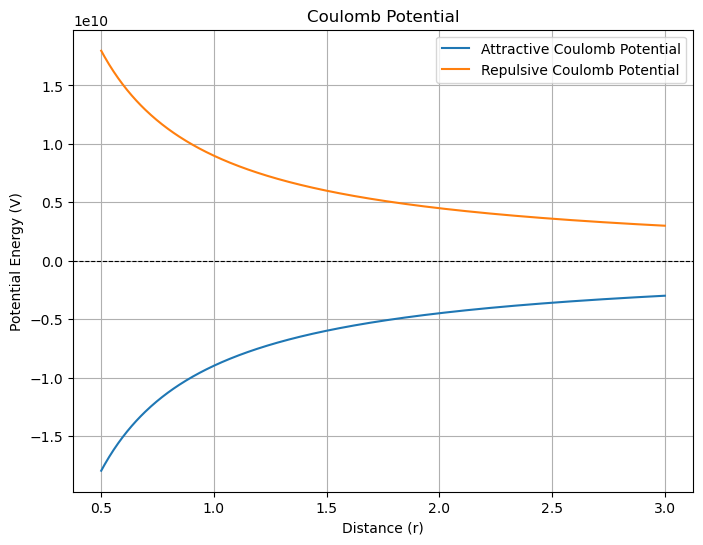

In [5]:
def coulomb_potential(r,q1,q2):
    epsilon_0 = 8.854187817e-12  # Vacuum permittivity
    return (q1 * q2) / (4 * np.pi * epsilon_0 * r)

r = np.linspace(0.5, 3, 500)  # Avoid r=0 to prevent division by zero
V_coulomb_attractive = coulomb_potential(r, 1, -1)
V_coulomb_repulsive = coulomb_potential(r, 1, 1)
plt.figure(figsize=(8, 6))
plt.plot(r, V_coulomb_attractive, label='Attractive Coulomb Potential')
plt.plot(r, V_coulomb_repulsive, label='Repulsive Coulomb Potential')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Coulomb Potential')
plt.xlabel('Distance (r)')
plt.ylabel('Potential Energy (V)')
plt.legend()
plt.grid()
plt.show()


# Chapter 2 Polarization and Many-Body Potentials

Most interactions discussed above are pairwise additive. This is not an exact representation of chemical interactions, because here the particles influence each other which is described via **many-body effects**

In the lecture the following strategies are discussed:

**Polarizable Models:** Polarization corresponds to charge shifts withing the chemical system.

+ Charge-on-spring model
+ Shell models
+ Explicit polarization
+ Charge Equilibration schemes

**Many-body potentials:** Here the local electron density $\rho$ is determined for each atom to compute the interaction.

+ Embedded Atom Model (EAM)
+ Finnis Sinclair Potential
+ Brenner Potential

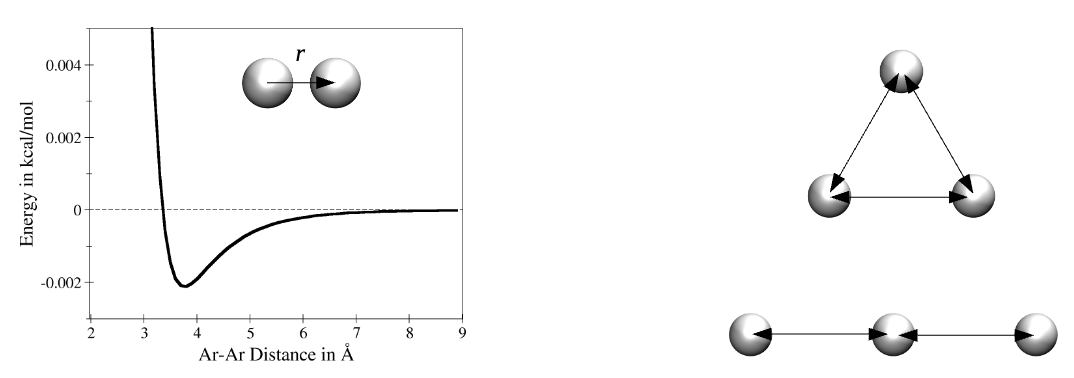




### Charge on a Spring model

> A spring particle with charge $q_s$ is attached to each atom, carrying the charge $q_a$ via the harmonic spring


We set the atom charge in the following way:

\begin{equation*}
q_a = q_t - q_s
\end{equation*}

+ $q_a$ is the atom charge
+ $q_s$ is the spring charge
+ $q_t$ is the charge of the target atom

If the atom and the spring are in the same position, the overall charge of the atom $q_a$ is equal to the target charge $q_t$.

If the electric field $E$ of the neighbouring atoms acts on the system the spring particle is displaced and a dipole is induced. The positon of the spring particle is determined when the spring force $F_s$ is equal to the electric force $F_e$ acting on the spring particle.

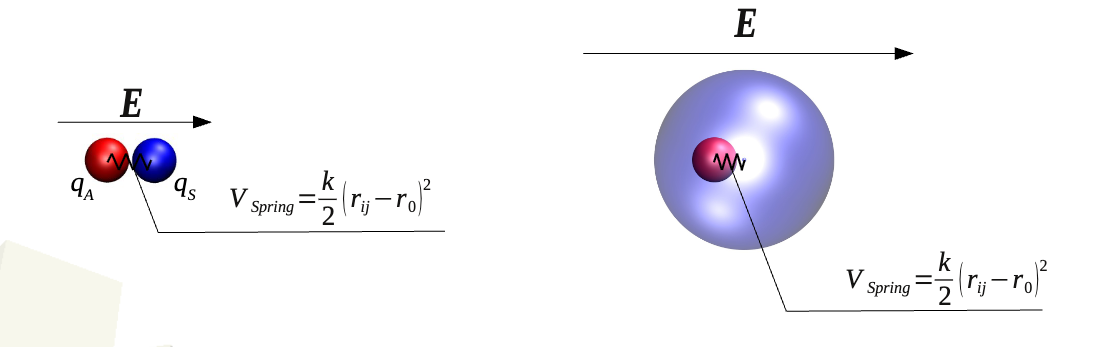

### Shell Model

> The shell model is a more sophisticated version of the charge-on-spring-model. Here the spring particle is replaced by a Gaussian charge distribution.

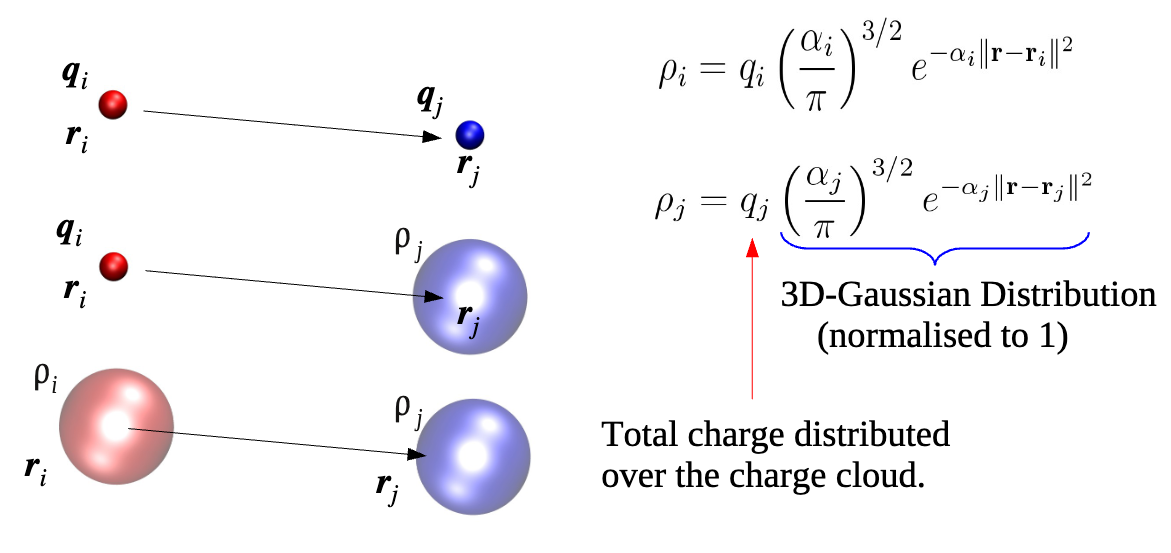

So we want to model the 3D charge distribution in python. This means the formula

\begin{equation*}
\rho_j = q_j (\frac{\lambda_j}{\pi})^{3/2} e^{-\lambda_j (r - r_j)^2}
\end{equation*}
is used to describe the charge distribution of the shell particle. The charge density $\rho_j$ is given by the product of the charge $q_j$ and the Gaussian function. The parameter $\lambda_j$ describes the width of the Gaussian distribution and $r_j$ is the position of the shell particle.


We give $X,Y$ as domains and calculate the distance between $X,Y$ via:

\begin{equation*}
R = \sqrt{X^2 + Y^2}
\end{equation*}

In [6]:
def gaussian_distribution_3D(q, lam, X, Y):
    # Calculate the Distance

    R = np.sqrt(X**2 + Y**2)
    Z = q * (lam/np.pi)**(3/2) * np.exp(-lam * R**2)
    return Z

def plot_3D_gaussian(q=1, lambda_=1):
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = gaussian_distribution_3D(q, lambda_, X, Y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('3D Gaussian Distribution')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    plt.show()
# Create interactive widget for 3D Gaussian distribution
interact(plot_3D_gaussian, q=(0.1, 2.0, 0.1), lambda_=(0.1, 2.0, 0.1))

interactive(children=(FloatSlider(value=1.0, description='q', max=2.0, min=0.1), FloatSlider(value=1.0, descri…

<function __main__.plot_3D_gaussian(q=1, lambda_=1)>

What you can see really good here is that the $\lambda$ parameter is a measure for the width of the Gaussian distribution. 

A problem is that for large distances the modified Couloumb law coincides with the Coloumb law of point charges

\begin{equation*}
V_{ij} = \frac{q_i q_j}{4 \pi \epsilon_0 r_{ij}}
\end{equation*}

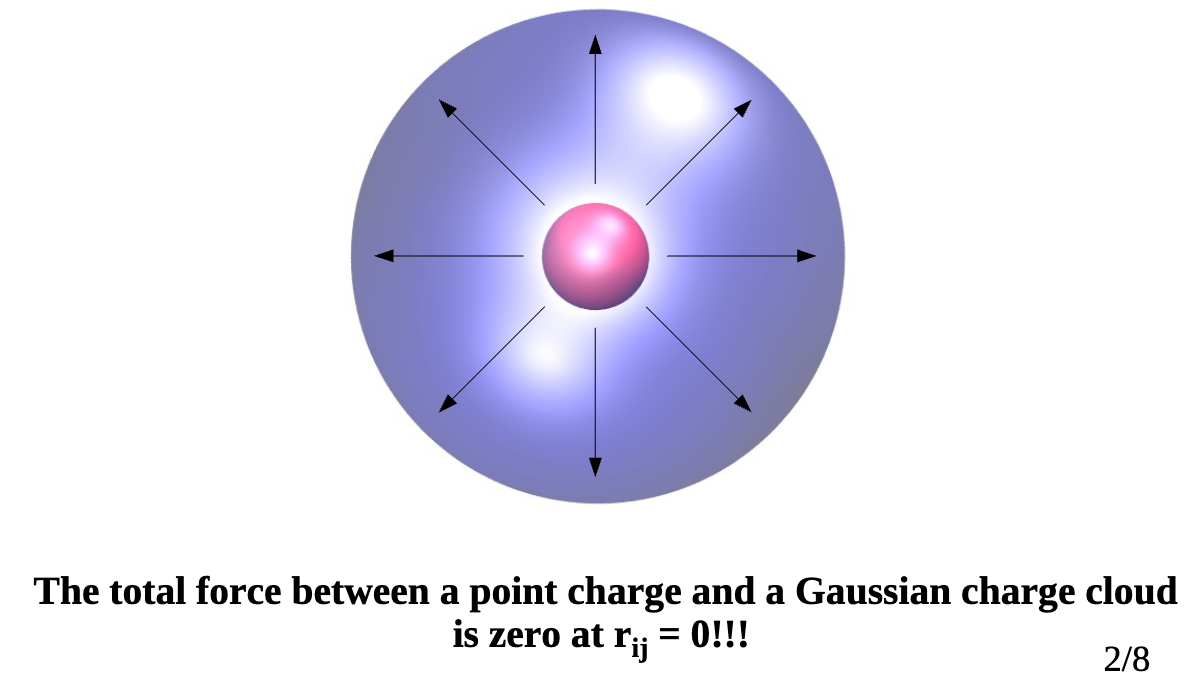


This is where we employ the **gaussian error function** to avoid this singularity at $r_{ij} = 0$.

The error function is defined as:

\begin{equation*}
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
\end{equation*}

Note that there exists the complementary error function which fullfill the following equation:

\begin{equation*}
\text{erfc}(x) = 1 - \text{erf}(x)
\end{equation*}

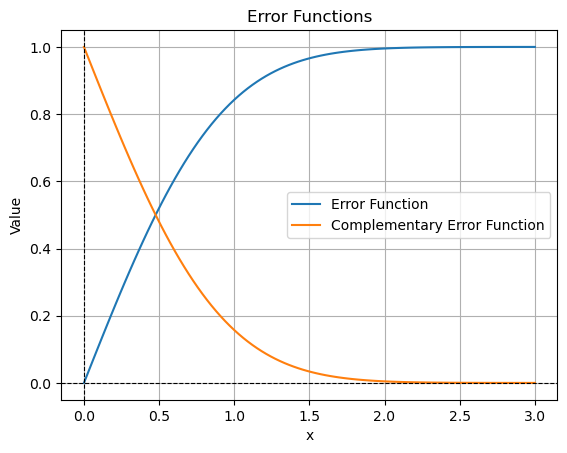

In [7]:
from scipy import special

x = np.linspace(0,3,100)
plt.plot(x, special.erf(x), label='Error Function')
plt.plot(x, special.erfc(x), label='Complementary Error Function')
plt.title('Error Functions')
plt.xlabel('x')
plt.ylabel('Value')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()



In [ ]:
# now we plot the normal Couloumb Potnetial and also multiply the Error function to remove the singularity

def coloumb_potential(q1=1,q2=1,r=1):
    epsilon_0 = 8.854187817e-12  # Vacuum permittivity
    return (q1 * q2) / (4 * np.pi * epsilon_0 * r)

def coloumb_potential_errorfunction(q1=1,q2=1,alpha=1,r=1):
    epsilon_0 = 8.854187817e-12  # Vacuum permittivity
    return (q1 * q2) / (4 * np.pi * epsilon_0) * special.erf(np.sqrt(alpha)*r) / r

def plot_coloumb_potential(q1=1,q2=1,alpha=1):
    r = np.linspace(0.2, 4, 500)  # Avoid r=0 to prevent division by zero
    V = coloumb_potential(q1,q2,r)
    V_error = coloumb_potential_errorfunction(q1,q2,alpha,r)
    plt.figure(figsize=(8, 6))
    plt.plot(r, V, label='Coulomb Potential')
    plt.plot(r, V_error, label='Coulomb Potential with Error Function', linestyle='--')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Coulomb Potential with Error Function')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.legend()
    plt.grid()
    plt.show()
# Create interactive widget for Coulomb potential with error function
interact(plot_coloumb_potential, q1=(-10, 10, 0.1), q2=(-10, 10, 0.1), alpha=(0.1, 2.0, 0.1))

interactive(children=(FloatSlider(value=1.0, description='q1', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

<function __main__.plot_coloumb_potential(q1=1, q2=1, alpha=1)>

In [9]:
# Make a derivatrive of the function above

def plot_coloumb_potential_derivative(q1=1,q2=1,alpha=1):
    r = np.linspace(0.1, 4, 500)  # Avoid r=0 to prevent division by zero
    V = coloumb_potential(q1,q2,r)
    V_error = coloumb_potential_errorfunction(q1,q2,alpha,r)
    dV = -np.gradient(V)
    dV_error =-np.gradient(V_error)
    plt.figure(figsize=(8, 6))
    plt.plot(r, dV, label='Coulomb Potential Derivative')
    plt.plot(r, dV_error, label='Coulomb Potential with Error Function Derivative', linestyle='--')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title('Coulomb Potential Derivative with Error Function')
    plt.xlabel('Distance (r)')
    plt.ylabel('Potential Energy (V)')
    plt.legend()
    plt.grid()
    plt.show()

# Create interactive widget for Coulomb potential with error function
interact(plot_coloumb_potential_derivative, q1=(-10, 10, 0.1), q2=(-10, 10, 0.1), alpha=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='q1', max=10.0, min=-10.0), FloatSlider(value=1.0, de…

<function __main__.plot_coloumb_potential_derivative(q1=1, q2=1, alpha=1)>

What we can observe:

+ The normal coloumb potential diverges at $r_{ij} = 0$, this is not possible if we want to use the shell model
+ The error function is used to avoid this singularity
+ Smaller $\alpha$ values in the error function lead to more smaller peaks, so that the respective derivative is then zero (force)

## Explicit Polarization Model

> Goal of explicit polarization is to model an induced tipole having an dipole moment $\mu$ 

This is done by using the polarisability $\alpha$ of the atoms. This is characteristic property of an atom or molecule, and determines the size of the induced dipole resulting from an electic field $E$


\begin{equation*}
\mu = \alpha E
\end{equation*}

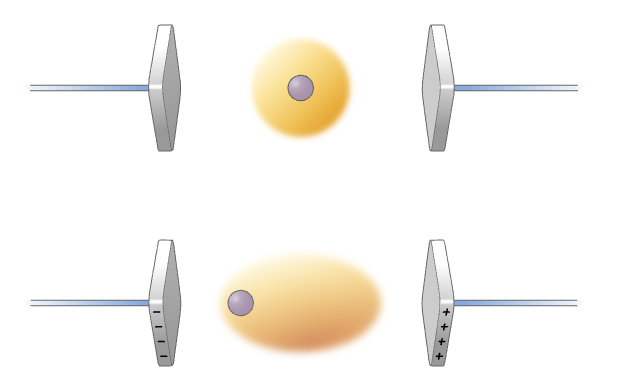

The polarisability tells us how much the electron cloud of an atom is distorted by an external electric field. Some factors that influenece the polarisability are:

+ The number of electrons in the system. The more electrons, the less control the nucleus has overt the charge distribution
+ The greater the distanceo f the electrons from the nuclear charge, the less control the nuclear charge has on the charge distribution, thus increasiing polarisability

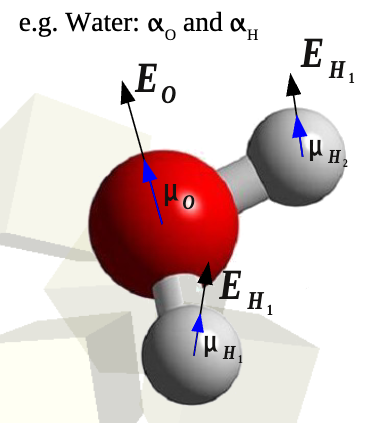

Note that the electric field $E$ is dependent on the point charges $q$ and the dipole moments $\mu$ of all the other atoms. In this case a cyclic scheme has to be employed to find all dipoles.

The polarisation energy is obtained via:

\begin{equation*}
V_{pol} = -\sum_{i=1}^N \mu_i \cdot E_i - \frac{1}{2} \sum_{i=1}^N \frac{||\mu_i||^2}{\alpha_i}
\end{equation*}



By using $\mu = \alpha E$ we use the approximation that $\alpha$ is a scalar, this means that the dipole moment points in the same direction than the electric field $\mu$ which is only a crude approximation.

To get a better approximation we use the polarization tensor $\alpha_{ij}$ which is a 3x3 matrix. The dipole moment is then given by:

\begin{equation*}
\mu_i = \sum_{j=1}^3 \alpha_{ij} E_j
\end{equation*}

The tensor has the form

\begin{equation*}
\alpha_{ij} = \begin{pmatrix}
\alpha_{xx} & \alpha_{xy} & \alpha_{xz} \\
\alpha_{yx} & \alpha_{yy} & \alpha_{yz} \\
\alpha_{zx} & \alpha_{zy} & \alpha_{zz}
\end{pmatrix}
\end{equation*}
The diagonal elements $\alpha_{xx}, \alpha_{yy}, \alpha_{zz}$ are the polarizabilities in the $x,y,z$ direction. The off-diagonal elements $\alpha_{xy}, \alpha_{xz}, \alpha_{yz}$ are the coupling terms between the different directions.

Another shortcoming of this model is that the polarisability $\alpha$ still only depends linearly on the electric field $E$. Higher order dependencies can be introduced by the hyperpolarizabilities $\beta$ and $\gamma$

\begin{equation*}
\mu = \alpha E + \beta E^2 + \gamma E^3
\end{equation*}

This concept can be used to make a **non-linear,anisotropic polarisation model**.

### Electronegativity Equilisation Method

> EAM is a simple framework for the derivation of partial charges

We need:

+ Molecular geometry
+ Electronegativity of the atoms $\chi$
+ Hardness $\eta$

For each atom $i$ we solve

\begin{equation*}
\chi_{mol} = \chi_i + \eta_i q_i + \sum_{j \neq i}^N \frac{q_j}{r_{ij}}
\end{equation*}



#### Calculate the model for water

For water with 3 atoms we want to determine the four unknowns $q_O, q_{H1},q_{H2} and \chi_{mol}$. For this we need four equations (One constraint on the total charges)

\begin{align*}
\chi_O + \eta_O q_O + \frac{q_{H1}}{r_{OH1}} + \frac{q_{H2}}{r_{OH2}} &= \chi_{mol} \\
\chi_{H1} + \eta_{H1} q_{H1} + \frac{q_O}{r_{OH1}} + \frac{q_{H2}}{r_{H1H2}} &= \chi_{mol} \\
\chi_{H2} + \eta_{H2} q_{H2} + \frac{q_O}{r_{OH2}} + \frac{q_{H1}}{r_{H1H2}} &= \chi_{mol} \\
q_O + q_{H1} + q_{H2} &= Q_{mol}
\end{align*}


As we already know the electronegativity of the atoms and the hardness we can rearrange the equations to get the following form:

\begin{align*}
\eta_O q_O + \frac{q_{H1}}{r_{OH1}} + \frac{q_{H2}}{r_{OH2}} - \chi_{mol} &= -\chi_O \\
\eta_{H1} q_{H1} + \frac{q_O}{r_{OH1}} + \frac{q_{H2}}{r_{H1H2}} - \chi_{mol} &= -\chi_{H1} \\
\eta_{H2} q_{H2} + \frac{q_O}{r_{OH2}} + \frac{q_{H1}}{r_{H1H2}} - \chi_{mol} &= -\chi_{H2} \\
-q_O - q_{H1} - q_{H2} &= -Q_{mol}
\end{align*}

This now gives us the following matrix form:

\begin{equation*}
\begin{pmatrix}
\eta_O & \frac{1}{r_{OH1}} & \frac{1}{r_{OH2}} & -1 \\
\frac{1}{r_{OH1}} & \eta_{H1} & \frac{1}{r_{H1H2}} & -1 \\
\frac{1}{r_{OH2}} & \frac{1}{r_{H1H2}} & \eta_{H2} & -1 \\
-1 & -1 & -1 & 0
\end{pmatrix}
\begin{pmatrix}
q_O \\
q_{H1} \\
q_{H2} \\
\chi_{mol}
\end{pmatrix}
=
\begin{pmatrix}
-\chi_O \\
-\chi_{H1} \\
-\chi_{H2} \\
-Q_{mol}
\end{pmatrix}
\end{equation*}

In [109]:
eta_O = 28.64 #eV
eta_H = 35.9 #eV
chi_O = 14.72 #eV
chi_H = 1.0 #eV

r_OH = 0.975 # Angstrom
r_HH = 1.51 # Angstrom

# Convert Angstrom to eV

r_OH = r_OH 
r_HH = r_HH

eV_for_Angstrom = 14.4

inverse_r_OH = eV_for_Angstrom / r_OH
inverse_r_HH = eV_for_Angstrom / r_HH



# Initialize the Matrix

A = np.array([[eta_O, inverse_r_OH, inverse_r_OH, -1], 
          [inverse_r_OH, eta_H, inverse_r_HH, -1], 
          [inverse_r_OH, inverse_r_HH, eta_H, -1], 
          [-1, -1, -1, 0]])

b = np.array([-chi_O,-chi_H,-chi_H,0])

# Solve the System of equations

x = np.linalg.solve(A, b)

print(A)

print("-------------------")

print(b)
print("-------------------")
print("The solution is: ", x)

[[28.64       14.76923077 14.76923077 -1.        ]
 [14.76923077 35.9         9.53642384 -1.        ]
 [14.76923077  9.53642384 35.9        -1.        ]
 [-1.         -1.         -1.          0.        ]]
-------------------
[-14.72  -1.    -1.     0.  ]
-------------------
The solution is:  [-0.62878813  0.31439406  0.31439406  5.99822498]


## Many-body potentials

### Finnis Sinclair Potential

> In a many-body potential the force of a particle depends in a non-additive way on the coordinates of all other atoms inside a cutoff 

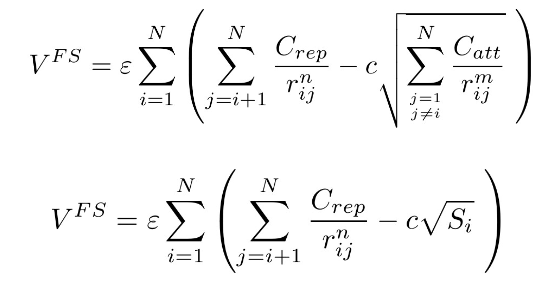

Lets now discuss the key komponents of this potential energy functional:

**Repulsive Term**

\begin{equation*}
\sum_{j = i+1}^N \frac{C_{rep}}{r_{ij}^{n}}
\end{equation*}

This term represents the short-range repulsive forces (Pauli-Exclusion) between pairs of atoms $i$ and $j$. This decais rapidly with the distance

**Attractive Term**

\begin{equation*}
-c \sqrt{S_i} ~ \text{where} ~ S_i = \sum_{j=1, j \neq i}^N \frac{C_{att}}{r_{ij}^{m}}
\end{equation*}

This term introduces the many body effects. THe attractive force on an atom $i$ depends on a collective enviroment of all neighboring atoms $j$ through $AS_i$ The square root makes the potential non-additive

+ $c$ is a weighting factor for the attractive term

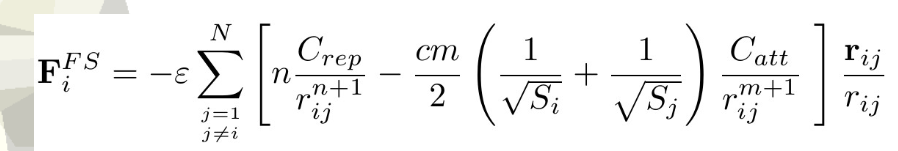

In the force expression we see that first the many body contributions $S_i$ and $S_j$ are required before the force contributions can be evaluated.



#### The Loop Structure Compared

We can clearly see that two loops are required. First the Repulsive Part is calculated then we need to compute the attractive part.

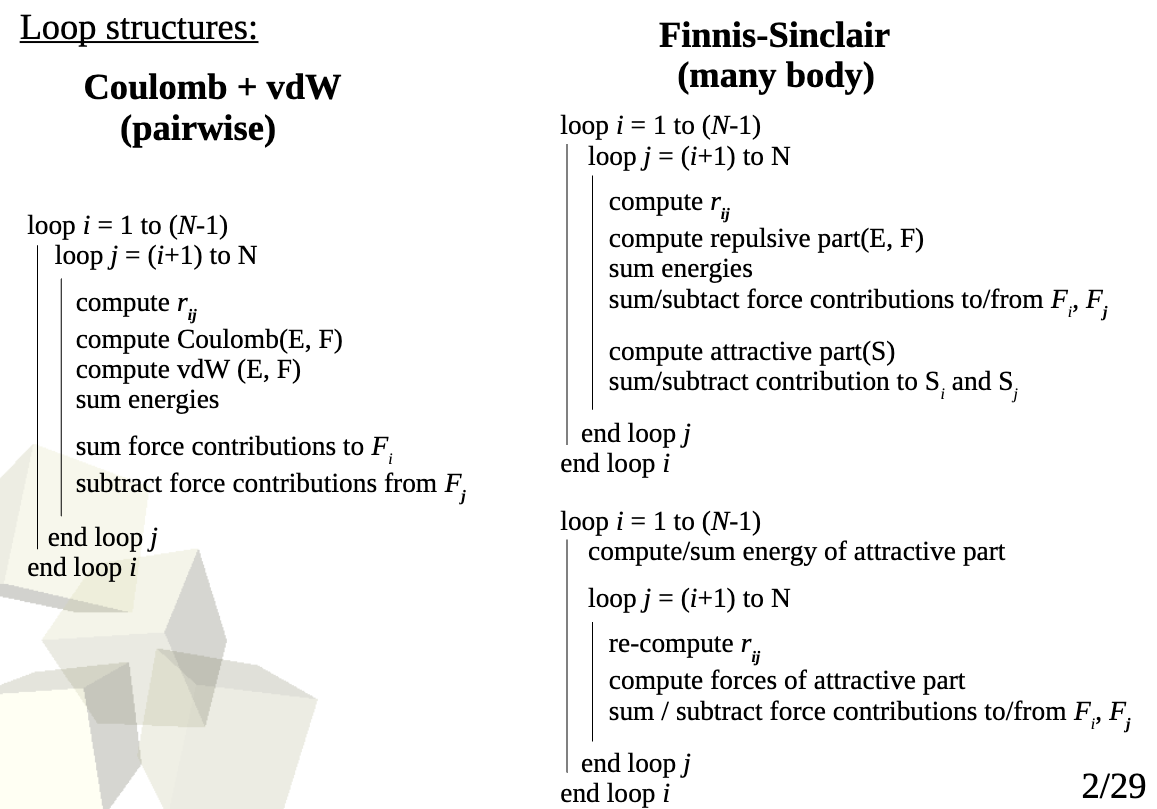

### Embedded Atom Method

In this approach the force acting on a particle $i$ depends, in addition to a pairwise contribution $\phi$ on the location of a number of nearby particles via the evaluation of the local electron density $\rho_i$.


\begin{equation*}
V = \sum_{i^1}^{N-1}\sum_{j=i+1}^{N} \phi(r_{ij}) + \sum_{i=1}^N F(\rho_i)
\end{equation*}

+ $\rho_i$ is the local electron density at atom $i$
+ $F(\rho_i)$ is the embedding energy of atom $i$ in the local electron density $\rho_i$
+ $\phi(r_{ij})$ is the pair potential between atoms $i$ and $j$

Where

\begin{equation*}
\rho_i = \sum_{j=1, j \neq i}^N \rho_j(r_{ij})
\end{equation*}

The electron density $\rho_i$ is determined via a pairwise summation over non-linear atomic density contributions $\rho_j$. Also the embedding functions $F_i$ are non-linear. This non-linearity is responsible for the many-body character of this potential model.


This approach is significally more demanding than pair-wise approaches. First the electron density $\rho_i$ has to be determined via a double loop over all the atoms

### Brenner Potential

> The functional form of the Brenner potential is more complex compared to the previous approaches. It is mainly used for the computational treatment of Fullerenes, Nanotubes and similar compounds.

The Parameters $c_{ij},s_{ij},\beta_{ij}\bar{r}_{ij}$ and the cutoff distances $r_{ij,1},r_{ij,2}$ are defined for each pair of atoms bein CC,CH, and HH

\begin{equation*}
V^{Brenner} = \sum_{i=1}^N \sum_{j=1, j \neq i}^N f_{ij} \frac{c_{ij}}{s_{ij} - 1} \left[ U_{rep} - B_{ij}, U_{att} \right]
\end{equation*}

Here $U_{att}, U_{rep}$ are the attractive and repulsive terms of the Brenner Potential

\begin{equation*}
U_{att} = s_{ij} \exp(-\sqrt{\frac{2}{s_{ij}}}*\beta_{ij}(r_{ij} - \bar{r}_{ij}))
\end{equation*}

\begin{equation*}
U_{rep} = \exp(-\sqrt{2s_ij}*\beta_{ij}(r_{ij} - \bar{r}_{ij}))
\end{equation*}

### Reactive Force Fields

A new development in the last decade was the emerge of reactive force fields. These are molecular mechanical approaches capable to describe cleavage and formation of chemcial bonds.

ReaxFF is a reactive force field which is based on the concept of bond order. The bond order is a measure of the strength of a chemical bond between two atoms.

> "ReaxFF exmplys a bond-order formalism in conjunction with polarisable charge descriptions to describe both reactive and non-reactive interactions between atoms"

\begin{equation*}
E_{system} = E_{bond} + E_{over} + E_{angle} + E_{tors} + E_{vdW} + E_{Coloumb} + E_{specific}
\end{equation*}

Where $E_{over}$ is a energy penalty preventing the over coordination of atoms.

# Chapter 3: Potential Energy Surfaces

**Definition**: The potential energy $V$ of a system determines which structures are likely/unlikely to be observed. Because $V$ is a function of all coordinates of the system, we call it surface in configuration space $\vec{Q}$ being the configuration vector.

In the next visualization we consider x,y to be two coordinates of the system, the potential energy is then a function of these two coordinates. We consider the function $x^2 + y^2 *sin(x)$ as our potential energy function.

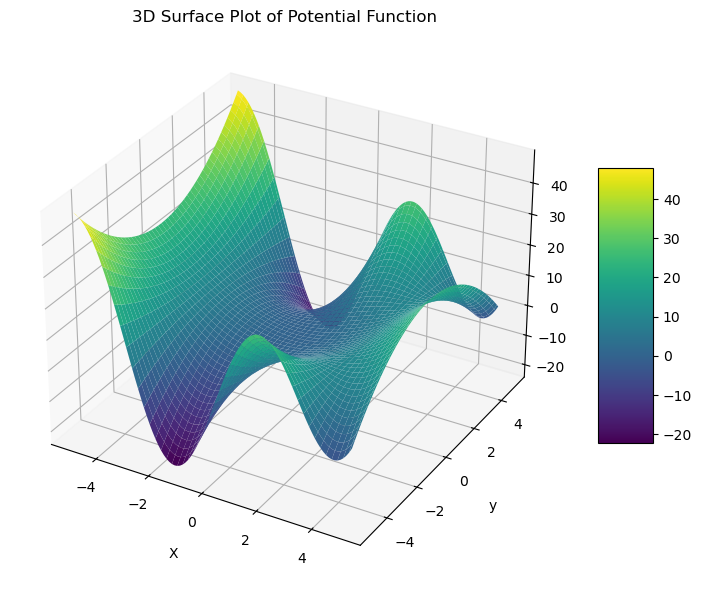

In [110]:
def potential_surface_test_function(x, y):
    return x**2 + y**2 * np.sin(x)

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Make grid of X,Y values
X, Y = np.meshgrid(x, y)
Z = potential_surface_test_function(X, Y)
# Plot the surface

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Surface Plot of Potential Function')
ax.set_xlabel('X', labelpad=10)
ax.set_ylabel('y', labelpad=10)
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()



In the description of a chemical system the total energy $E$ plays a crucial role and is given by

\begin{equation*}
E = V + T
\end{equation*}

The total energy determines all the accessible regions:

+ If the potential energy $V$ equals $E$ the kinetic energy $T$ is zero
+ If the potential energy is lower than $E$, the kinetic energy $T$ is non-zero correspoding to thermal energy of the system 

\begin{equation*}
T = \frac{mv^2}{2} = \frac{p^2}{2m} = \frac{3}{2}kT
\end{equation*}

where $m$ is the mass of the particle, $v$ is the velocity, $p$ is the momentum and $k$ is the Boltzmann constant.

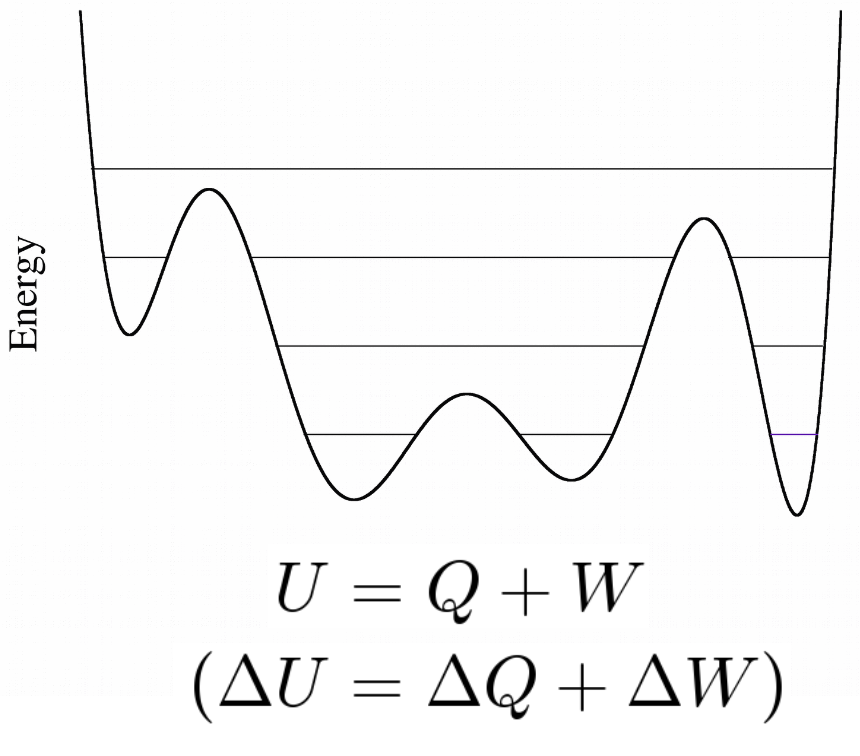

### Derivatives, Hessian, Curvature

The general definition of a derivative is given by the limit. A function $f(x)$ is differentiable at a point $a$ if the following limit exists:

\begin{equation*}
f'(a) = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}
\end{equation*}

Considering a vector-valued function $y(t)$, it can be split up into its components $y_1(t),y_2(t),y_3(t)$. The derivative of the vector function $y(t)$ is defined to be the tanged vectors whose coordinates are the derivatives of the components of $y(t)$:

\begin{equation*}
y'(t) = \lim_{h \to 0} \frac{y(t+h) - y(t)}{h}
\end{equation*}

In general if a function $f$ depends on more variables we can define partial derivatives in respect to the variables.

\begin{equation*}
\frac{\partial f}{\partial x} = \lim_{h \to 0} \frac{f(x+h,y) - f(x,y)}{h}
\end{equation*}

The gradient of a function $f$ is defined as the vector of all partial derivatives:

\begin{equation*}
\nabla f(x,y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)
\end{equation*}

If we want to calculate derivatives of a function numerically we have three possibilities:

1. **Forward difference**: $f'(x) = \frac{f(x+h) - f(x)}{h}$
2. **Backward difference**: $f'(x) = \frac{f(x) - f(x-h)}{h}$
3. **Central difference**: $f'(x) = \frac{f(x+h) - f(x-h)}{2h}$



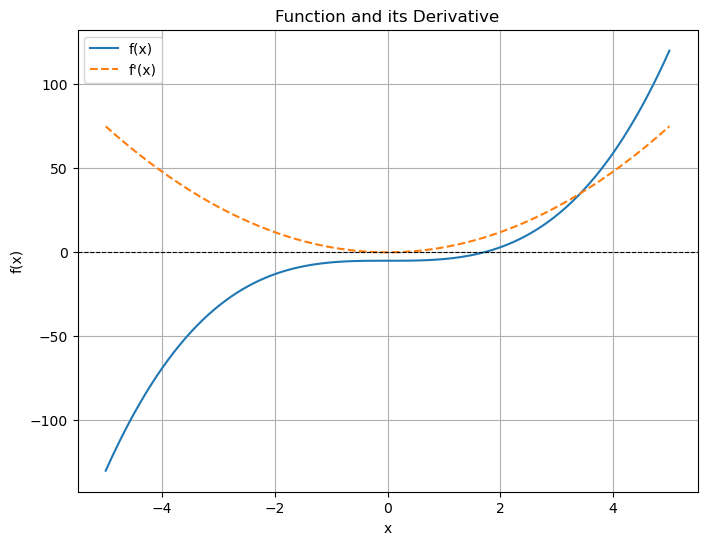

In [111]:
def derivative(f,a,method="central",h=1e-5):
    """ 
    Computes the difference formula for f'(a) with the step size h
    """


    if method=="central":
        return (f(a+h)-f(a-h))/(2*h)
    elif method=="forward":
        return (f(a+h)-f(a))/h
    elif method=="backward":
        return (f(a)-f(a-h))/h
    else:
        raise ValueError("Unknown method. Use 'central', 'forward', or 'backward'.")
    
def f(x):
    return x**3  -5

x = np.linspace(-5, 5, 100)
y = f(x)
y_prime = derivative(f, x, method="central")
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x)')
plt.plot(x, y_prime, label="f'(x)", linestyle='--')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Function and its Derivative')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

We now determine how we can find local minima and maxima of a given function.

**Definition**

Consider a function $f$ which takes values of a subset $D \subset \mathbb{R}^n$:

$f: D \subset \mathbb{R}^n \to \mathbb{R}$ has at $x_0 \in D$:

+ a local minimum if there exists a neighbourhood $U$ of $x_0$ such that $f(x_0) \leq f(x)$ for all $x \in U$
+ a local maximum if there exists a neighbourhood $U$ of $x_0$ such that $f(x_0) \geq f(x)$ for all $x \in U$


An extreme point can be found by setting the gradient to zero:
\begin{equation*}
\nabla f(x_0) = 0
\end{equation*}
This is a necessary condition for a local minimum or maximum. However, it is not sufficient. We need to check the second derivative of the function at the point $x_0$.

The second derivative of a multivariable function is given by the Hessian matrix $H$:

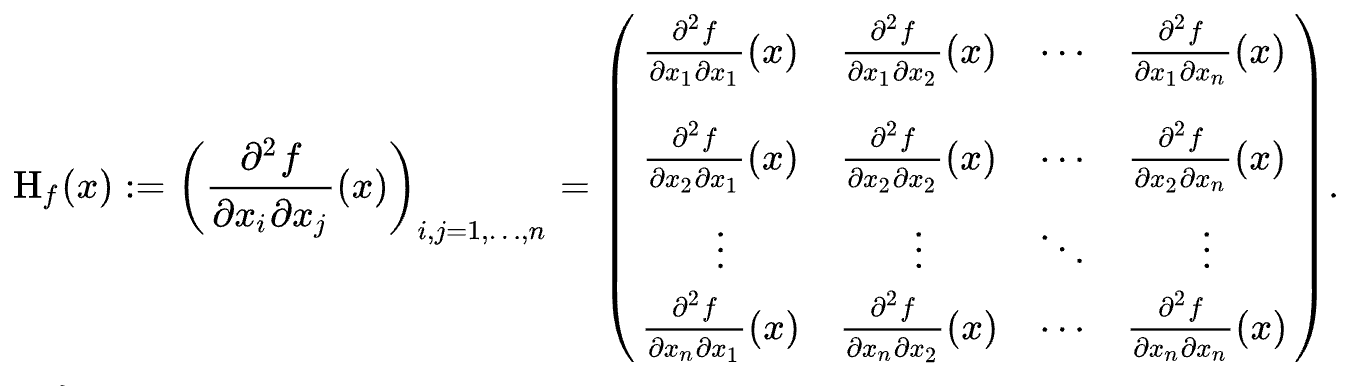


+ Ist die Matrix an einer Stelle positiv definit so befindet man sich im lokalen minimum (>0)
+ Ist sie negativ definit so handelt es sich um ein lokales maximum (<0). 
+ Ist die Matrix indefinit so handelt es sich um einen Sattelpunkt.








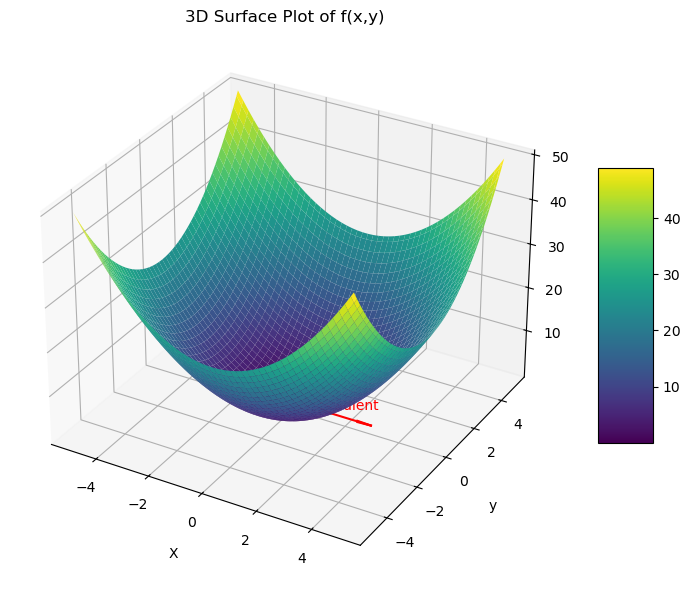

In [112]:
def f(x,y):
    return x**2 + y**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)


# Compute the gradient
def gradient(f, x, y, h=1e-5):
    """ Computes the gradient of f at (x,y) using central difference """
    df_dx = (f(x + h, y) - f(x - h, y)) / (2 * h)
    df_dy = (f(x, y + h) - f(x, y - h)) / (2 * h)
    return np.array([df_dx, df_dy])

# Compute the gradient at a point
x0 = 1
y0 = 0
grad = gradient(f, x0, y0)


# Make grid of X,Y values
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
# Plot the surface
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
# Plot the gradient vector
ax.quiver(x0, y0, f(x0, y0), grad[0], grad[1], 0, length=1, color='red', label='Gradient')
ax.text(x0, y0, f(x0, y0), 'Gradient', color='red')

ax.set_title('3D Surface Plot of f(x,y)')
ax.set_xlabel('X', labelpad=10)
ax.set_ylabel('y', labelpad=10)
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()






### Hessian Matrix Decomposition

The Hessian matrix is square and symmetric it can be decomposed into a diagonal form.

\begin{equation*}
H = Q \Lambda Q^T
\end{equation*}

where $Q$ is an orthogonal matrix and $\Lambda$ is a diagonal matrix. The eigenvalues of the Hessian matrix are the diagonal elements of the matrix $\Lambda$. The eigenvectors are the columns of the matrix $Q$.

Eigenvalues: [1. 2. 3. 4.]
Eigenvectors: [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
The Hessian matrix is positive definite --> Minimum


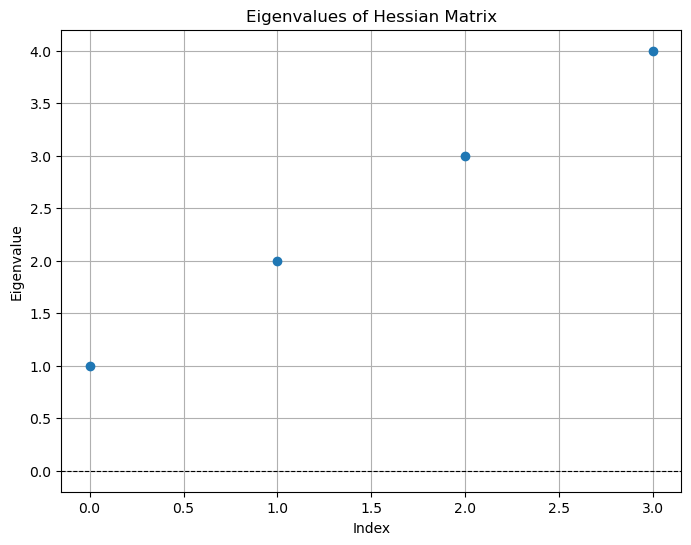

In [113]:
# example hesssian matrix 4x4
hessian_matrix = np.array([[1, 0, 0, 0],
                              [0, 2, 0, 0],
                              [0, 0, 3, 0],
                              [0, 0, 0, 4]])

#calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(hessian_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

if np.all(eigenvalues > 0):
    print("The Hessian matrix is positive definite --> Minimum")
elif np.all(eigenvalues < 0):
    print("The Hessian matrix is negative definite --> Maximum")
# Plot the eigenvalues
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, 'o')
plt.title('Eigenvalues of Hessian Matrix')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.grid()
plt.show()

In [114]:
def hessian(x):
    """ 
    Computes the hessian matrix with finite differences

    Parameters:
        - x: ndarray

    Returns:
        - an array of shape (x.dim,x.dim) + x.shape
    """
    x_grad = np.gradient(x)
    hessian = np.empty((x.ndim,x.ndim)+x.shape, dtype=x.dtype)
    for k, grad_k in enumerate(x_grad):
        # iterate over the dimensions 
        # apply gradient to every component of first derivative
        temp_grad = np.gradient(grad_k)
        for l, grad_kl in enumerate(temp_grad):
            hessian[k,l, :, :] = grad_kl
    return hessian

x = np.random.rand(2,2) # makes a 2x2 matrix
hess = hessian(x)
print("Hessian matrix:")
print(hess)


Hessian matrix:
[[[[ 0.          0.        ]
   [ 0.          0.        ]]

  [[-1.00070819 -1.00070819]
   [-1.00070819 -1.00070819]]]


 [[[-1.00070819 -1.00070819]
   [-1.00070819 -1.00070819]]

  [[ 0.          0.        ]
   [ 0.          0.        ]]]]


## Energy Minimization Techniques


### Steepest Descent

In terms of our potential energy surface we can formulate stepest descent as follows:

\begin{equation*}
Q'  = Q + \alpha g
\end{equation*}

where $Q$ is the current position, $Q'$ is the new position, $\alpha$ is the step size and $g$ is the gradient of the potential energy surface at the current position.

In a general optimization problem we want to find a set of varaiables $x$ that minimize or maximize an objective function $f(x)$:

\begin{equation*}
\min_{x} f(x)
\end{equation*}

For presenting the algorithm we now define a quadratic multivariable objective function $f(x): \mathbb{R}^2 \to \mathbb{R}$:

\begin{equation*}
f(x) = 0.5 * (x_0 - 4.5)^2 + 2.5(x_1 - 2.3)^2
\end{equation*}

As the gradient is defined as the vector of all partial derivatives we can write the gradient of the function $f(x)$ as:

\begin{equation*}
\nabla f(x) = \left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)
\end{equation*}

\begin{equation*}
\frac{\partial f}{\partial x_0} = (x_0 - 4.5)
\end{equation*}

\begin{equation*}
\frac{\partial f}{\partial x_1} = 5(x_1 - 2.3)
\end{equation*}


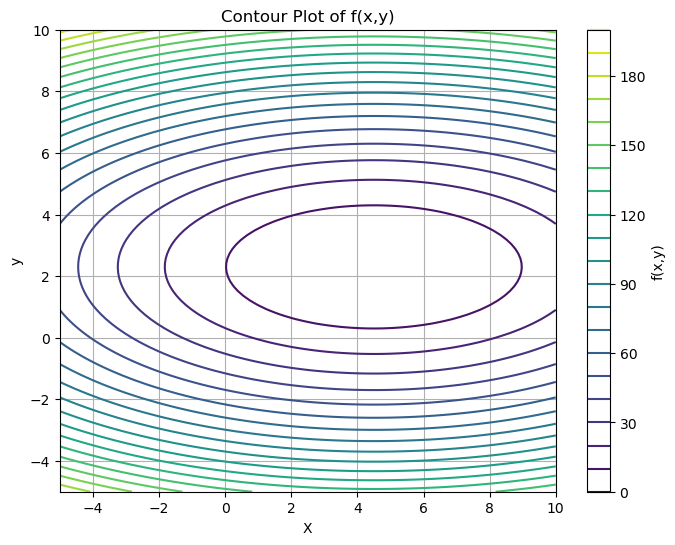

In [115]:
def f(x):
    return 0.5*(x[0] - 4.5)**2 + 2.5*(x[1]-2.3)**2

def df(x):
    return np.array([x[0] - 4.5, 5*(x[1]-2.3)])

# Plot the function

x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)

# Make grid of X,Y values
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
# Plot the 2d contour
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.title('Contour Plot of f(x,y)')
plt.xlabel('X')
plt.ylabel('y')
plt.colorbar(label='f(x,y)')
plt.grid()
plt.show()


Now steepest descent is given by

\begin{equation*}
x_{k+1} = x_k + \alpha_k p_k
\end{equation*}

where $p_k = -\nabla f(x_k)$ is the search direction and $\alpha_k$ is the step size. The step size can be determined by a line search. The line search is given by

**The Algoritm**

1. Select a starting point $x = x_0$
2. Select a maximum number of iterations $M$
3. Select a tolerance $tol$
4. Set step counter $n$
5. Use Equation to perform descent
6. Check for convergenve / max iterations


In [116]:
def steepest_descent(gradient, x0, alpha=0.01, max_iter=100, tol=1e-6):
    """
    Steepest descent optimization algorithm
    """
    results = np.array([]) # store results each iteration

    # Initial gradient and starting point
    x = x0
    gradient_x = df(x)

    # Step count
    steps = 0

    results = np.append(results,x,axis=0)

    while any(abs(gradient_x) > tol) and steps < max_iter:
        
        x = x- alpha*gradient_x

        # Append to results
        results = np.append(results,x,axis=0)
        
        # Evaluate new gradient
        gradient_x = df(x)

        # Increment the iteration counter
        steps += 1

    return results.reshape(-1,2), steps

points, iter = steepest_descent(df, np.array([-9, -9]), alpha=0.3, max_iter=100, tol=1e-6)

print(points)
# Minimal point
print("Minimal point:", points[-1])
print("Number of iterations:", iter)


[[-9.         -9.        ]
 [-4.95        7.95      ]
 [-2.115      -0.525     ]
 [-0.1305      3.7125    ]
 [ 1.25865     1.59375   ]
 [ 2.231055    2.653125  ]
 [ 2.9117385   2.1234375 ]
 [ 3.38821695  2.38828125]
 [ 3.72175186  2.25585938]
 [ 3.95522631  2.32207031]
 [ 4.11865841  2.28896484]
 [ 4.23306089  2.30551758]
 [ 4.31314262  2.29724121]
 [ 4.36919984  2.30137939]
 [ 4.40843989  2.2993103 ]
 [ 4.43590792  2.30034485]
 [ 4.45513554  2.29982758]
 [ 4.46859488  2.30008621]
 [ 4.47801642  2.29995689]
 [ 4.48461149  2.30002155]
 [ 4.48922804  2.29998922]
 [ 4.49245963  2.30000539]
 [ 4.49472174  2.29999731]
 [ 4.49630522  2.30000135]
 [ 4.49741365  2.29999933]
 [ 4.49818956  2.30000034]
 [ 4.49873269  2.29999983]
 [ 4.49911288  2.30000008]
 [ 4.49937902  2.29999996]
 [ 4.49956531  2.30000002]
 [ 4.49969572  2.29999999]
 [ 4.499787    2.30000001]
 [ 4.4998509   2.3       ]
 [ 4.49989563  2.3       ]
 [ 4.49992694  2.3       ]
 [ 4.49994886  2.3       ]
 [ 4.4999642   2.3       ]
 

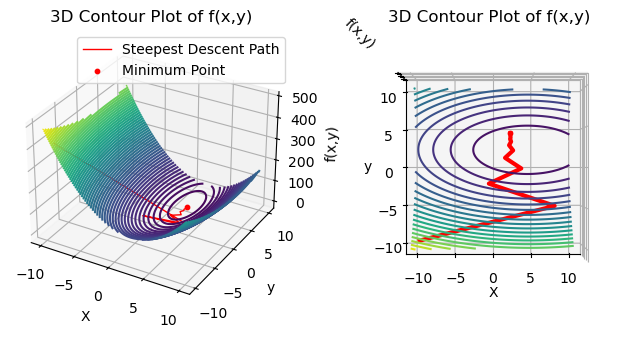

In [117]:
minimal_point = points[-1]

X_estimate, Y_estimate = points[:,0], points[:,1]
Z_estimate = f(np.array([X_estimate, Y_estimate]))

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
# Make grid of X,Y values
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Plot
fig = plt.figure(figsize=(8, 6))

#First subplot
ax = fig.add_subplot(1,2,1, projection='3d')
ax.contour3D(Y,X,Z, 60, cmap='viridis')
ax.plot(Y_estimate, X_estimate, Z_estimate,  linewidth=1, color="red",  label='Steepest Descent Path')
ax.scatter(minimal_point[1],minimal_point[0], f(minimal_point), color='red', s=10, label='Minimum Point')
ax.set_title('3D Contour Plot of f(x,y)')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
#Second subplot
ax = fig.add_subplot(1,2,2, projection='3d')
ax.contour3D(X,Y,Z, 20, cmap='viridis')
ax.plot(Y_estimate, X_estimate, Z_estimate,  linewidth=3, color="red",  label='Steepest Descent Path')
ax.scatter(minimal_point[1],minimal_point[0], f(minimal_point), color='red', s=10, label='Minimum Point')
ax.set_title('3D Contour Plot of f(x,y)')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.axes.zaxis.set_ticklabels([])
ax.view_init(90,-90)

### Conjugent Gradient Method

The conjugate gradient method is again a iterative method for optimization of a given functional. In respect to our Potential Energy Surface we can formulate the conjugate gradient method as follows:

\begin{equation*}
Q' = Q + \alpha g_k^{cg}
\end{equation*}

where $Q$ is the current position, $Q'$ is the new position, $\alpha$ is the step size and $g_k^{cg}$ is the conjugate gradient of the potential energy surface at the current position. In this method the gradient used information of previous steps to determine the new search direction. This is done by using the following equation:

\begin{equation*}
q_k^{cg} = g_k + \gamma g_{k-1}
\end{equation*}

where $g_k$ is the current gradient and $g_{k-1}$ is the previous gradient. The parameter $\gamma$ is a scaling factor that determines how much of the previous gradient is used in the new search direction.

There are different method to determine the scaling factor $\gamma$. The most common methods are:

**Fletcher-Reeves Method**

\begin{equation*}
\gamma_{FR} = \frac{g_k^T g_k}{g_{k-1}^T g_{k-1}}
\end{equation*}

**Polak-Riberie Method**

\begin{equation*}
\gamma_{PR} = \frac{g_k^T (g_k - g_{k-1})}{g^T_{k-1}g_{k-1}}
\end{equation*}

#### Iterative Algorithm with Conjugate Gradient

We later talk about how we can use CGD do also directly find our solution, this is quite expensive because we need to compute Gram-Schmidt for large matrices.

In principle we need $A$-orthogonal vectors $D$, but we can compute them iteratively. We start out in a direction given by the initial gradient, then construct each next direction ensuring that we are conjugate to all previous directions. We basically construct a $A$-orthogonal basis on the fly


Let $r_t$ denote the residual or negative gradient at iteration $t$:

\begin{equation}
r_t = -g_t = b- A x_t
\end{equation}

Let $d_t$ denote the direction of the step. At each step we want to construct a new direction vector $d_{t+1}$ such that is $A$-orthogonal to all previous directions

Intialize $d_0 = r_0$. We start by following the negative gradient. At the next iteration we want $d_t$ to be conjugate to all previous directions.

We therefore substract the projection of all previous directions onto $d_t$ (on the fly Gram-Schmidt)

\begin{equation}
d_t = r_t - \sum_{k<t} \beta_{tk}d_k
\end{equation}

where $\beta_{tk}$ is the projection of $r_t$ onto $d_k$

$\beta_{tk}$ is the conventional notation for the $A$-projection

\begin{equation}
\beta_{tk} = \frac{r_t^T A d_k}{d_k^T A d_k}
\end{equation} 

Finally we want to take a step in the direction of $d_t$ with step size $\alpha_t$

\begin{equation}
x_{t+1} = x_t + \alpha_t  d_t
\end{equation}

The optimal $\alpha_t$ is found by minimizing the quadratic form

\begin{equation}
\alpha_t = \frac{r_t^T d_t}{d_t^T A d_t}
\end{equation}

[[4 1]
 [1 2]]
[0 2]


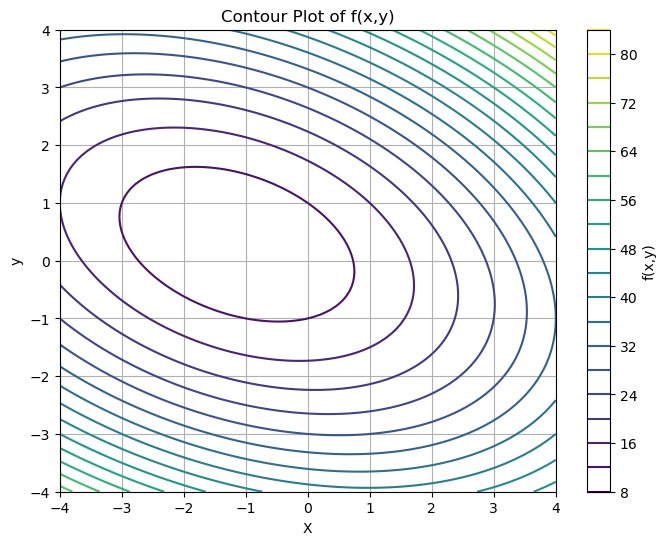

In [161]:
A = np.array([[4,1],[1,2]])
b = np.array([0,2])

print(A)
print(b)

# This gives te quadratic form f(x) = 0.5*x^T*A*x + b^T*x
def f(x):
    return 0.5 * np.dot(x, np.dot(A, x)) + np.dot(b, x) + 10

# Plot this function
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)

for i in range(len(x)):
    for j in range(len(y)):
        x0 = np.array([x[i], y[j]])
        Z[i, j] = f(x0)




# Make grid of X,Y values
X, Y = np.meshgrid(x, y)

# Plot the 2d contour
plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.title('Contour Plot of f(x,y)')
plt.xlabel('X')
plt.ylabel('y')
plt.colorbar(label='f(x,y)')
plt.grid()
plt.show()



Conjugate Gradient Descent Points:
[[ 0.20255281  0.72316584]
 [-0.23995327  0.8244917 ]
 [-0.28571429  1.14285714]]
Conjugate Gradient Descent Directions:
[[-1.53337706  0.35111552]
 [-0.09244086  0.64312329]]


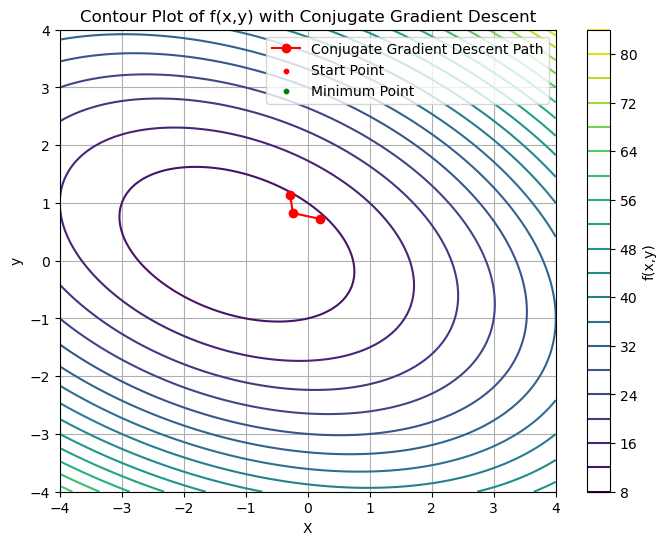

In [165]:
def cgd_iter(A,b):
    """
    Runs conjugate gradient descent
    """
    dim = A.shape[0]
    x = np.random.rand(dim) # Initialize guess
    xs = [x] # Store the points
    ds = []

    for i in range(dim):

        # Compute search direction
        r = b - A @ x

        # Remove previous search directions
        projs = 0
        for k in range(i):
            d_k = ds[k-1]
            beta_k = (r @ A @ d_k) / (d_k @ A @ d_k)
            projs += beta_k * d_k
        d = r - projs

        # Take step
        alpha = (r @ d) / (d @ A @ d)
        x = x + alpha * d
        xs.append(x)
        ds.append(d)

    return np.array(xs), np.array(ds)

# Run the conjugate gradient descent

xs, ds = cgd_iter(A,b)
print("Conjugate Gradient Descent Points:")
print(xs)
print("Conjugate Gradient Descent Directions:")
print(ds)

# Plot the points on the contour

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=20)
plt.title('Contour Plot of f(x,y)')
plt.xlabel('X')
plt.ylabel('y')
plt.colorbar(label='f(x,y)')
plt.plot(xs[:,0], xs[:,1], 'ro-', label='Conjugate Gradient Descent Path')
plt.scatter(xs[0,0], xs[0,1], color='red', s=10, label='Start Point')
plt.scatter(xs[-1,0], xs[-1,1], color='green', s=10, label='Minimum Point')
plt.legend()
plt.grid()
plt.title('Contour Plot of f(x,y) with Conjugate Gradient Descent')
plt.show()
